<a href="https://colab.research.google.com/github/ibedoor/Coding-Dojo-Python/blob/main/weekend_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

Install Kaggle

In [3]:
!pip install -q kaggle

Import Files

In [4]:
from google.colab import files

Upload `kaggle.json` File

In [5]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bedooralharbi","key":"6e22b509f58439b84385a6babda8e35a"}'}

Create Directory

In [6]:
!mkdir -p ~/.kaggle

Save `kaggle.json` File in `kaggle` Folder

In [7]:
!cp kaggle.json ~/.kaggle/

Change Permission

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

Download Dataset

In [9]:
!kaggle datasets download -d sootersaalu/amazon-top-50-bestselling-books-2009-2019

  0% 0.00/14.5k [00:00<?, ?B/s]
100% 14.5k/14.5k [00:00<00:00, 11.8MB/s]


Dataset Unzip

In [10]:
!unzip \*.zip && rm *.zip

Archive:  amazon-top-50-bestselling-books-2009-2019.zip
  inflating: bestsellers with categories.csv  


In [12]:
amazon = pd.read_csv('bestsellers with categories.csv')
df = pd.DataFrame(amazon)
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Display Columns

In [14]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

Info of DataFrame

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Check If There Are Any Null Values

In [18]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Check If There Are Any Duplicated Values

In [19]:
df.duplicated().sum()

0

###**Visualization**

Visualize the Genres

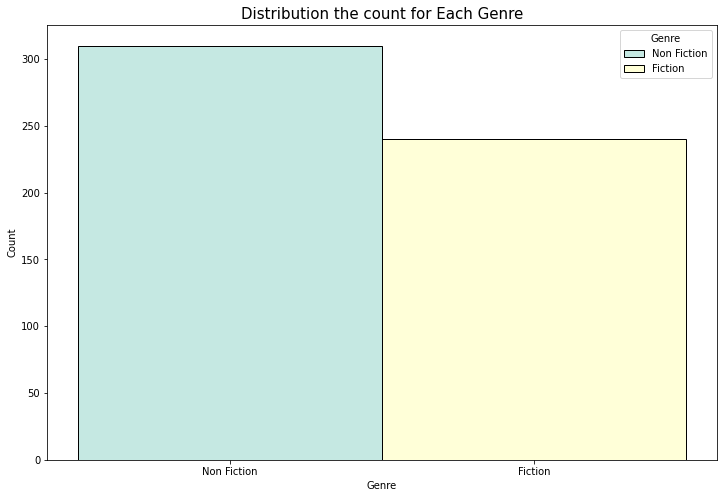

In [22]:
plt.figure(figsize=(12,8))
sns.histplot(x="Genre", hue="Genre",
              palette="Set3", data=df).set_title('Distribution the count for Each Genre', fontsize=15);

In [32]:
df['Author'].nunique()

248

In [30]:
df[df['User Rating'] > 4.5]['Author'].count()

392

In [51]:
authors = df.groupby(['Author'])['Name'].count()
authors

Author
Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2
Name: Name, Length: 248, dtype: int64

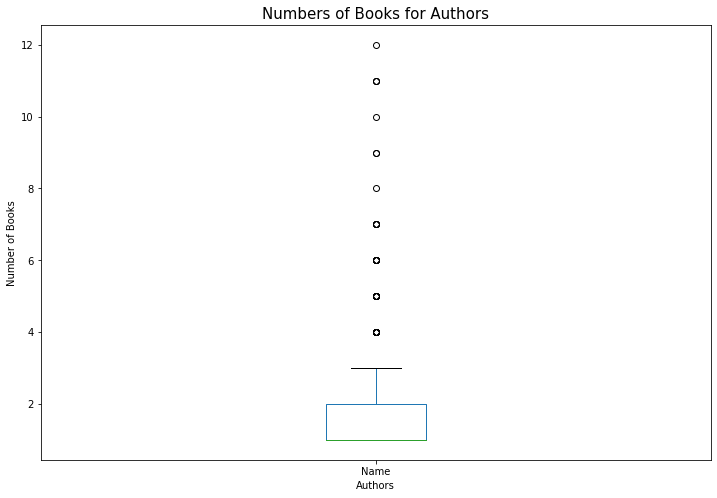

In [50]:
plt.figure(figsize=(12,8))
plt.xlabel('Authors')
plt.ylabel('Number of Books')
authors.plot.box().set_title('Numbers of Books for Authors', fontsize=15);

Visualize the Highest Books Price

In [84]:
heighest_price = df.nlargest(5,['Price'])
heighest_price

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction


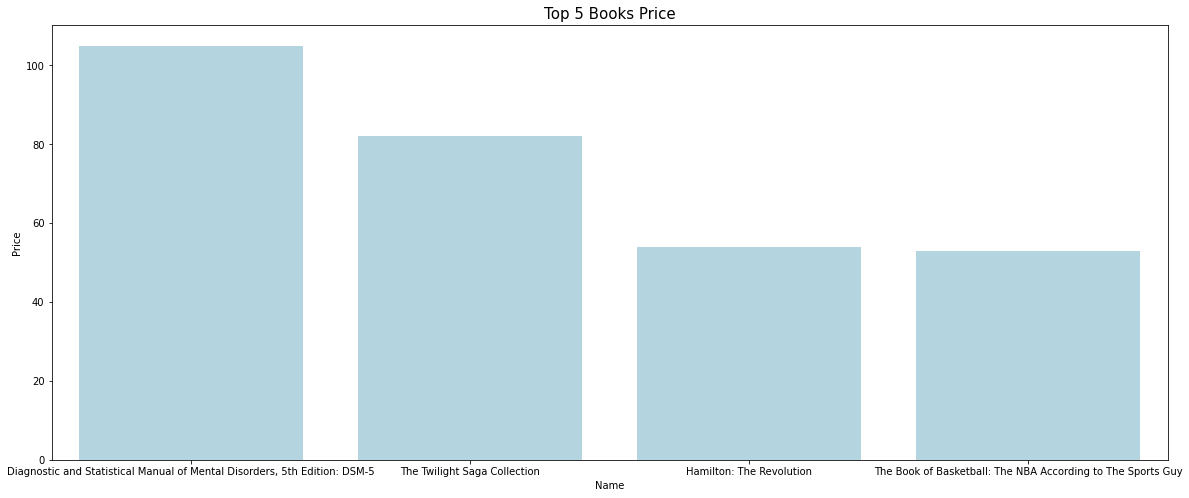

In [90]:
plt.figure(figsize=(20,8))
sns.barplot(x='Name', y='Price',
             color='lightblue',
             data = heighest_price).set_title('The Highest Books Price', fontsize=15);

Display Years in `groupby`

In [94]:
group_year = df.groupby(["Year"]).sum()
group_year

,User Rating,Reviews,Price
Year,,,
2009,229.2,235506,770
2010,227.9,273981,674
2011,227.9,405041,755
2012,226.6,654546,765
2013,227.7,654907,730
2014,231.1,792997,732
2015,232.4,711669,521
2016,233.9,709800,659
2017,233.0,644420,569


Choose Colors for Years

In [153]:
cs = cm.Set3(np.arange(11)/11.)

In Which Year Was the Reviews Heighest?

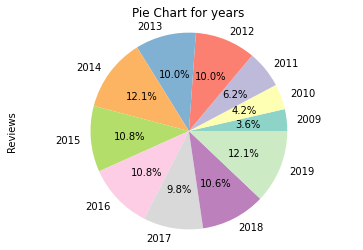

In [154]:
group_year.plot.pie(autopct='%.1f%%', y='Reviews', legend=False, colors = cs).axis('equal')
plt.title('Pie Chart for years')
plt.show();

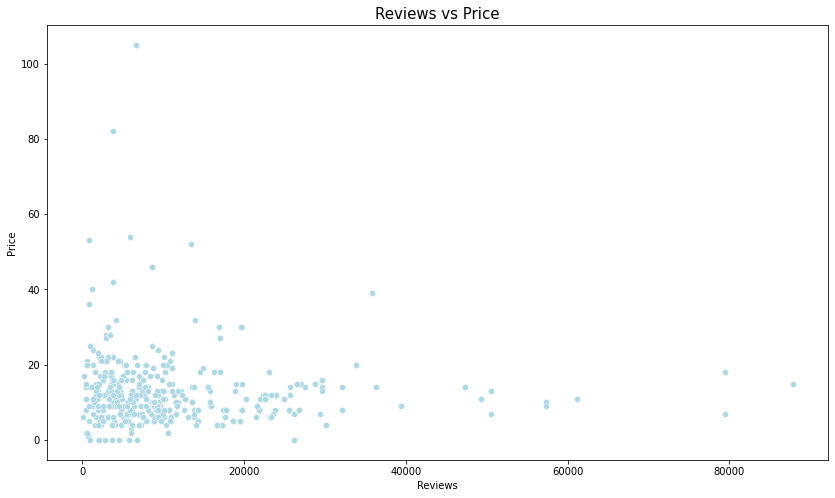

In [160]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df, x="Reviews", y="Price", color='lightblue').set_title('Reviews vs Price', fontsize=15);